#  Phenotypic phase planes

In [23]:
#In this screipt we analyse the phenotype phase planes for all relevant conditions: aerobic and anaerobic.
import pandas as pd
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model
from cobra.flux_analysis.phenotype_phase_plane import production_envelope
plt.style.use('ggplot')


In [24]:
# Verify working directory and change it if needed
# import os
# os.getcwd()
#os.chdir("DIR_PATH") #change accordingly

In [68]:
model = read_sbml_model("../data/models/yeast_resv_glc.xml")

In [26]:
# Original medium, no modifications done yet.
medium = model.medium

In [27]:
model.objective #check the model objective, since it is not biomass, we will change it to it.

## Phenotype phase plane for res-yeast.xml model
### Focus on biomass

In [29]:
ppp_biomass = production_envelope( model,
    reactions = [model.reactions.EX_glc__D_e],
    objective = model.reactions.BIOMASS_SC5_notrace)

In [30]:
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,0.287866,3.016363e+00,NaN,-10.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.275435,3.045455e+00,NaN,-9.476780
2,EX_glc__D_e,0.0,0.0,NaN,0.263005,3.077947e+00,NaN,-8.953560
3,EX_glc__D_e,0.0,0.0,NaN,0.250574,3.114473e+00,NaN,-8.430341
4,EX_glc__D_e,0.0,0.0,NaN,0.238143,3.155832e+00,NaN,-7.907121
5,EX_glc__D_e,0.0,0.0,NaN,0.225713,3.203053e+00,NaN,-7.383901
6,EX_glc__D_e,0.0,0.0,NaN,0.213282,3.257476e+00,NaN,-6.860681
7,EX_glc__D_e,0.0,0.0,NaN,0.200852,3.320885e+00,NaN,-6.337461
8,EX_glc__D_e,0.0,0.0,NaN,0.188421,3.395707e+00,NaN,-5.814241
9,EX_glc__D_e,0.0,0.0,NaN,0.175991,3.485327e+00,NaN,-5.291022


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

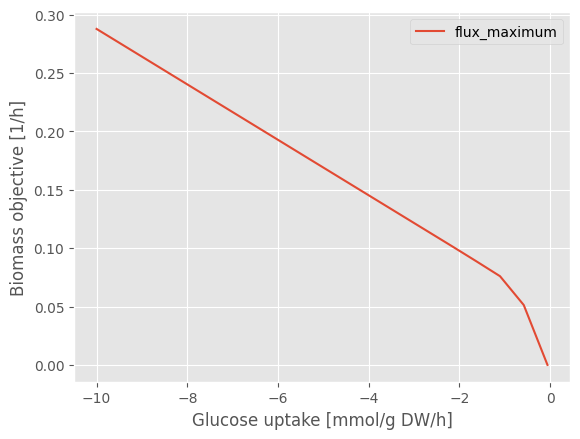

In [31]:
ppp_biomass.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]")


As we can see, the biomass decreases as the glucose uptake does. This behaviour is expected. Now lets increment glucose concentration.

#### Increment glucose concentration

In [69]:
print(model.reactions.EX_glc__D_e.bounds)

(-10.0, 999999.0)


In [75]:
medium = model.medium

medium['EX_glc__D_e'] = 1646
model.reactions.EX_glc__D_e.bounds = -20000, 999999.0

In [76]:
#print(model.reactions.EX_o2_e.bounds) #This is too little oxygen
print(model.reactions.EX_glc__D_e.bounds)

(-20000, 999999.0)


In [77]:
ppp_biomass = production_envelope( model,
    reactions = [model.reactions.EX_glc__D_e],
    objective = model.reactions.BIOMASS_SC5_notrace)

<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

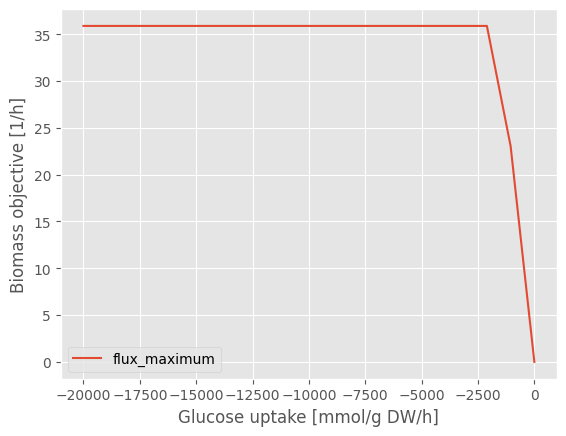

In [78]:
ppp_biomass.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]")


##### Determining the optimal O2 uptake rate

In [38]:
ppp_o2 = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.BIOMASS_SC5_notrace)
                    

In [39]:
ppp_o2.EX_o2_e[ppp_o2.flux_maximum.idxmax()]

-2.0

<AxesSubplot: xlabel='EX_o2_e'>

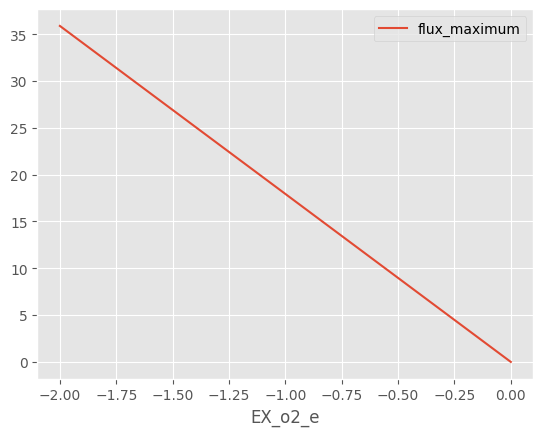

In [40]:
ppp_o2.plot(x='EX_o2_e', y='flux_maximum')


In [50]:
model.reactions.EX_o2_e.flux,

(-2.0,)

In [57]:
with model:
    model.objective = model.reactions.BIOMASS_SC5_notrace
    growth_rate = model.optimize().objective_value
    print("With O2 concentration", model.reactions.EX_o2_e.flux)
    print("Maximum growth rate is", growth_rate, "\n")
    

    medium['EX_o2_e'] = 20
    model.medium = medium

    model.objective = model.reactions.BIOMASS_SC5_notrace
    growth_rate = model.optimize().objective_value
    print("With O2 concentration", model.reactions.EX_o2_e.flux)
    print("Maximum growth rate is", growth_rate, "\n")


    medium['EX_o2_e'] = 200
    model.medium = medium

    model.objective = model.reactions.BIOMASS_SC5_notrace
    growth_rate = model.optimize().objective_value
    print("With O2 concentration", model.reactions.EX_o2_e.flux)
    print("Maximum growth rate is", growth_rate,"\n")

    medium['EX_o2_e'] = 2000
    model.medium = medium

    model.objective = model.reactions.BIOMASS_SC5_notrace
    growth_rate = model.optimize().objective_value
    print("With O2 concentration", model.reactions.EX_o2_e.flux)
    print("Maximum growth rate is", growth_rate,"\n")
    

With O2 concentration -2.0
Maximum growth rate is 35.88087549336204 

With O2 concentration -20.0
Maximum growth rate is 219.07110053929108 

With O2 concentration -200.0
Maximum growth rate is 229.12564774372322 

With O2 concentration -2000.0
Maximum growth rate is 299.73273966001403 



### Now lets focus on glucose uptake.
Resveratrol flux vs. glucose uptake

In [58]:
ppp_resveratrol = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.VVVST1)
ppp_resveratrol

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,857.464286,1.028957e+00,NaN,-10000.000000
1,EX_glc__D_e,0.0,0.0,NaN,812.351769,1.028979e+00,NaN,-9473.687307
2,EX_glc__D_e,0.0,0.0,NaN,767.239253,1.029003e+00,NaN,-8947.374613
3,EX_glc__D_e,0.0,0.0,NaN,722.126736,1.029029e+00,NaN,-8421.061920
4,EX_glc__D_e,0.0,0.0,NaN,677.014219,1.029060e+00,NaN,-7894.749226
5,EX_glc__D_e,0.0,0.0,NaN,631.901703,1.029095e+00,NaN,-7368.436533
6,EX_glc__D_e,0.0,0.0,NaN,586.789186,1.029135e+00,NaN,-6842.123839
7,EX_glc__D_e,0.0,0.0,NaN,541.676670,1.029182e+00,NaN,-6315.811146
8,EX_glc__D_e,0.0,0.0,NaN,496.564153,1.029238e+00,NaN,-5789.498452
9,EX_glc__D_e,0.0,0.0,NaN,451.451636,1.029304e+00,NaN,-5263.185759


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Resveratrol objective [mmol/g DW/h]'>

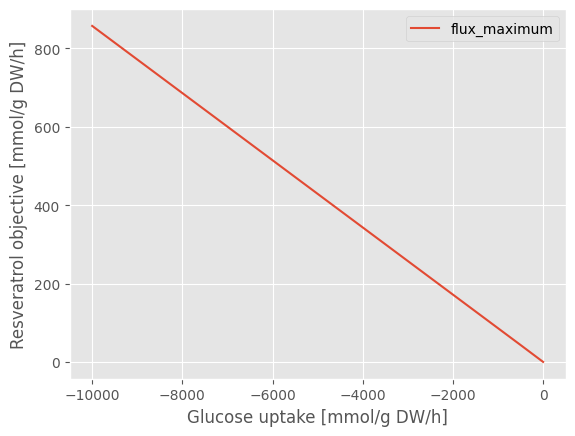

In [59]:
ppp_resveratrol.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", 
                         ylabel="Resveratrol objective [mmol/g DW/h]", grid=True)#.set_ylim(0, 3)

Now lets analyze biomass formation vs. O2 uptake

In [79]:
print(model.reactions.EX_o2_e.bounds) #This is too little oxygen

(-2.0, 999999.0)


In [85]:
medium = model.medium #Increase oxygen concentration

medium['EX_o2_e'] = 600
model.reactions.EX_o2_e.bounds = -1000, 0

In [86]:
print(model.reactions.EX_o2_e.bounds) #This is too little oxygen

(-1000, 0)


In [87]:
ppp_resv_o2 = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.VVVST1)
ppp_resv_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc__D_e,0.0,2.981508e-15,NaN,1896.385714,1.137831,NaN,-1000.000000
1,EX_glc__D_e,0.0,4.325720e-14,NaN,1886.799248,1.132080,NaN,-947.368421
2,EX_glc__D_e,0.0,4.772440e-14,NaN,1877.212782,1.126328,NaN,-894.736842
3,EX_glc__D_e,0.0,4.444045e-14,NaN,1867.626316,1.120576,NaN,-842.105263
4,EX_glc__D_e,0.0,4.528073e-14,NaN,1858.039850,1.114824,NaN,-789.473684
5,EX_glc__D_e,0.0,4.341154e-14,NaN,1848.453383,1.109072,NaN,-736.842105
6,EX_glc__D_e,0.0,4.522071e-14,NaN,1838.866917,1.103320,NaN,-684.210526
7,EX_glc__D_e,0.0,4.278562e-14,NaN,1829.280451,1.097568,NaN,-631.578947
8,EX_glc__D_e,0.0,4.966218e-14,NaN,1819.693985,1.091816,NaN,-578.947368
9,EX_glc__D_e,0.0,4.462051e-14,NaN,1810.107519,1.086065,NaN,-526.315789


<AxesSubplot: xlabel='Oxygen uptake rate [mmol/g DW/h]', ylabel='Resveratrol objective [mmol/g DW/h]'>

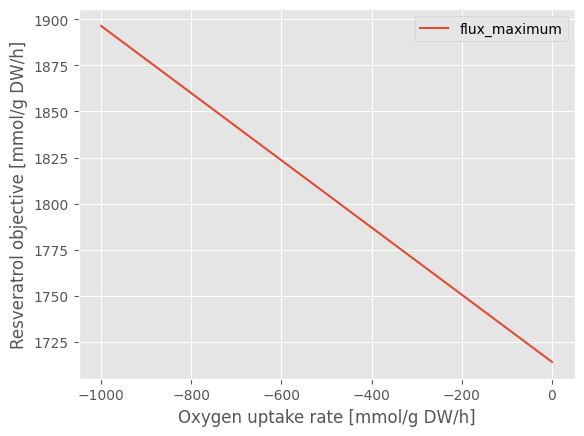

In [88]:
ppp_resv_o2.plot(x='EX_o2_e', y='flux_maximum', xlabel="Oxygen uptake rate [mmol/g DW/h]", ylabel="Resveratrol objective [mmol/g DW/h]", grid=True)